<a href="https://colab.research.google.com/github/Ebadi-Fereshteh/Deep-Learning/blob/main/Compare%20MLP%20vs%20CNN/mnist/mnist_mlp_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wandb

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import wandb
from wandb.keras import WandbCallback
import numpy as np
from sklearn.model_selection import train_test_split
import cv2

In [ ]:
wandb.init(project= "MLP mnist")

In [4]:
config = wandb.config
config.learning_rate = 0.01
# learning_rate = 0.01

In [5]:
(X_train, Y_train),(X_test, Y_test) = tf.keras.datasets.mnist.load_data()
# Y_train.reshape(-1, 1)

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0 , X_test / 255.0

In [7]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, shuffle=True)

### MLP Model

In [8]:
model = tf.keras.models.Sequential([
       tf.keras.layers.Flatten(input_shape=(28, 28)),
      #  Dense(128, activation="relu"),
       Dense(64, activation="relu"),
       Dense(32, activation="relu"),
       Dense(10, activation="softmax")                                     
])

In [9]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate= config.learning_rate),
              loss= tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

## Train

In [10]:
model.fit(X_train, Y_train, epochs= 50, validation_data=(X_validation, Y_validation), callbacks=[WandbCallback()])

Epoch 1/50
1407/1407 [==============================] - 8s 4ms/step - loss: 0.2880 - accuracy: 0.9134 - val_loss: 0.2611 - val_accuracy: 0.9256 - _timestamp: 1648371720.0000 - _runtime: 19.0000
Epoch 2/50
1407/1407 [==============================] - 6s 4ms/step - loss: 0.1853 - accuracy: 0.9465 - val_loss: 0.2038 - val_accuracy: 0.9411 - _timestamp: 1648371726.0000 - _runtime: 25.0000
Epoch 3/50
1407/1407 [==============================] - 6s 4ms/step - loss: 0.1603 - accuracy: 0.9554 - val_loss: 0.1736 - val_accuracy: 0.9507 - _timestamp: 1648371731.0000 - _runtime: 30.0000
Epoch 4/50
1407/1407 [==============================] - 6s 4ms/step - loss: 0.1461 - accuracy: 0.9586 - val_loss: 0.1652 - val_accuracy: 0.9567 - _timestamp: 1648371737.0000 - _runtime: 36.0000
Epoch 5/50
1407/1407 [==============================] - 6s 4ms/step - loss: 0.1372 - accuracy: 0.9619 - val_loss: 0.1536 - val_accuracy: 0.9601 - _timestamp: 1648371743.0000 - _runtime: 42.0000
Epoch 6/50
1407/1407 [========

## Test

In [11]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.5330 - accuracy: 0.9564


[0.5330252647399902, 0.9563999772071838]

In [12]:
model.save('mlp-mnist.h5')

## CNN Model

In [13]:
model = tf.keras.models.Sequential([
      layers.Conv2D(64, (3, 3), input_shape=(28,28, 1), activation='relu'),
      layers.MaxPooling2D(),
      layers.Conv2D(32, (3, 3), activation='relu'),
      layers.MaxPooling2D(),
      layers.Conv2D(32, (5, 5), activation='relu'),
      layers.Flatten(),
      
      Dense(48, activation='relu'),
      Dense(10, activation='softmax')
])


In [14]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate= config.learning_rate),
              loss = tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy']
              )


In [15]:
model_history = model.fit(X_train, Y_train, epochs=10, validation_data=(X_validation, Y_validation), callbacks=[WandbCallback()])

Epoch 1/10
1407/1407 [==============================] - 18s 8ms/step - loss: 0.1830 - accuracy: 0.9448 - val_loss: 0.1371 - val_accuracy: 0.9642 - _timestamp: 1648372017.0000 - _runtime: 316.0000
Epoch 2/10
1407/1407 [==============================] - 10s 7ms/step - loss: 0.1015 - accuracy: 0.9709 - val_loss: 0.1180 - val_accuracy: 0.9665 - _timestamp: 1648372027.0000 - _runtime: 326.0000
Epoch 3/10
1407/1407 [==============================] - 10s 7ms/step - loss: 0.0923 - accuracy: 0.9752 - val_loss: 0.1017 - val_accuracy: 0.9761 - _timestamp: 1648372037.0000 - _runtime: 336.0000
Epoch 4/10
1407/1407 [==============================] - 10s 7ms/step - loss: 0.0846 - accuracy: 0.9773 - val_loss: 0.0727 - val_accuracy: 0.9823 - _timestamp: 1648372048.0000 - _runtime: 347.0000
Epoch 5/10
1407/1407 [==============================] - 11s 8ms/step - loss: 0.0803 - accuracy: 0.9800 - val_loss: 0.1111 - val_accuracy: 0.9735 - _timestamp: 1648372059.0000 - _runtime: 358.0000
Epoch 6/10
1407/1407

In [16]:
test_loss, test_acc= model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0894 - accuracy: 0.9810


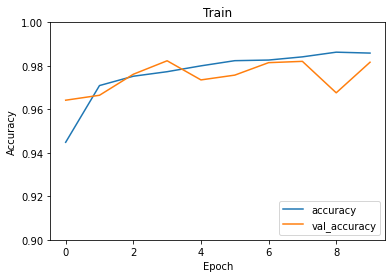

In [17]:
plt.plot(model_history.history['accuracy'], label='accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')



In [18]:
model.save('cnn-mlp-mnist.h5')